In [15]:
import noisereduce as nr
import soundfile as sf
from scipy.io import wavfile
import os
import io
import matplotlib.pyplot as plt
import urllib.request
import numpy as np
from noisereduce.generate_noise import band_limited_noise
%matplotlib inline
import IPython
import librosa

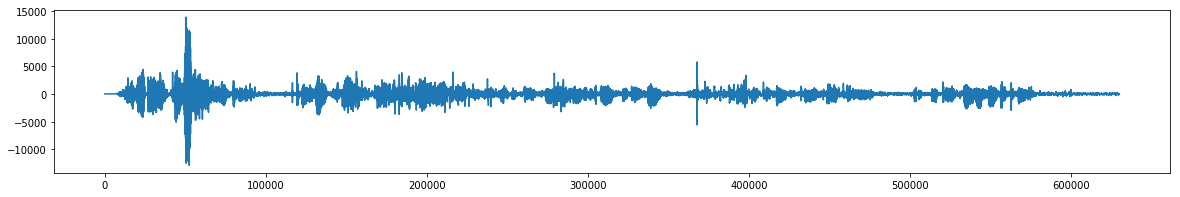

In [4]:
# load data
# url = "https://raw.githubusercontent.com/timsainb/noisereduce/master/assets/fish.wav"
# response = urllib.request.urlopen(url)
# data, rate = sf.read(io.BytesIO(response.read()))
# data = data

# load data
rate, data = wavfile.read("mywav.wav")
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(data)
IPython.display.Audio(data=data, rate=rate)

data = data / 32768 # because amplitudes are too big and noise will have virtually no effect without this step

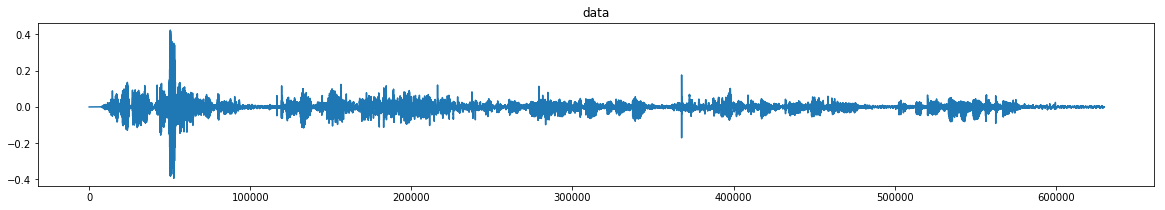

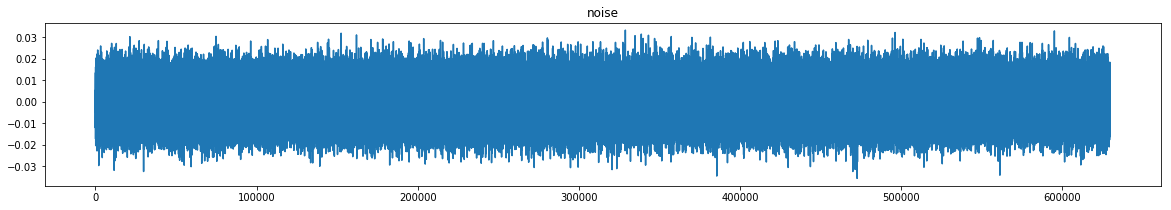

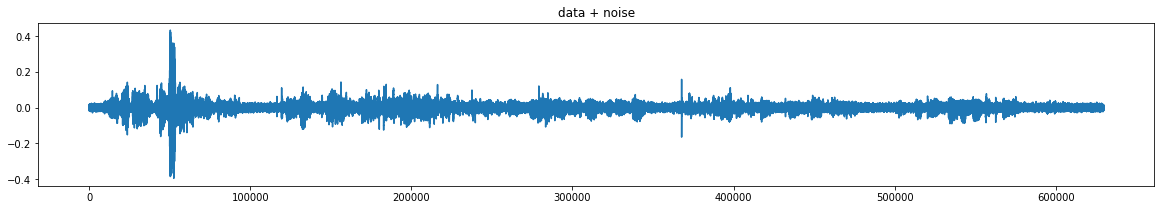

In [7]:
# add noise
noise_len = len(data) # seconds
noise = band_limited_noise(min_freq=400, max_freq = 8000, samples=len(data), samplerate=rate)*10
noise_clip = noise[:rate*noise_len]
audio_clip_band_limited = data+noise

fig, ax = plt.subplots(figsize=(20,3))
plt.title("data")
ax.plot(data)
# IPython.display.Audio(data=data, rate=rate)

fig, ax = plt.subplots(figsize=(20,3))
plt.title("noise")
ax.plot(noise)
# IPython.display.Audio(data=noise, rate=rate)

fig, ax = plt.subplots(figsize=(20,3))
plt.title("data + noise")
ax.plot(audio_clip_band_limited)
IPython.display.Audio(data=audio_clip_band_limited, rate=rate)
# tested: adding gaussian noise, adding salt and pepper noise

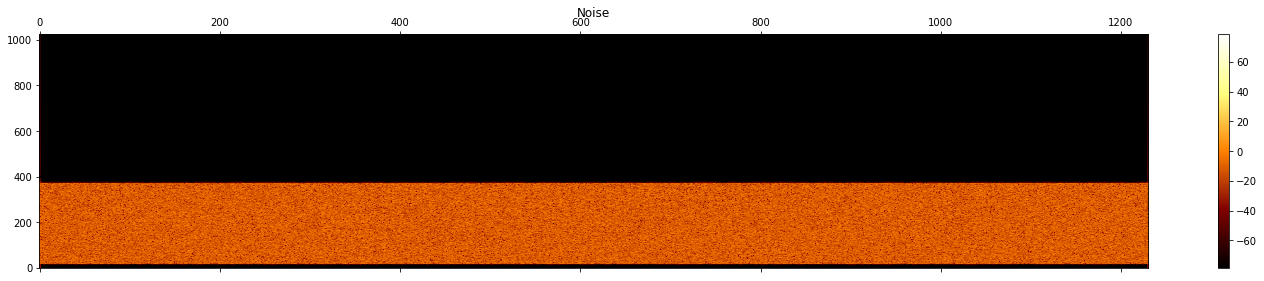

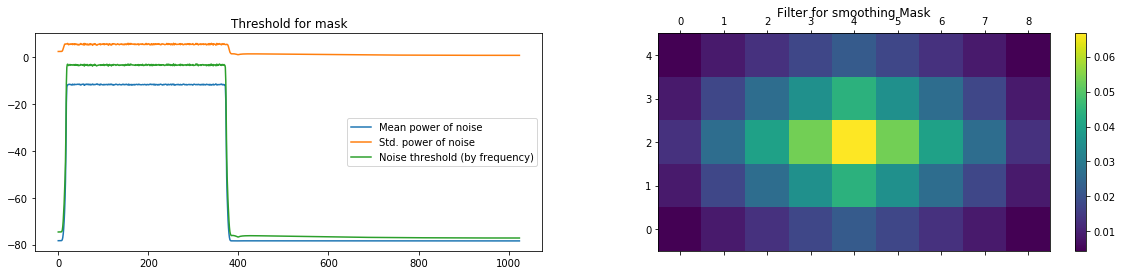

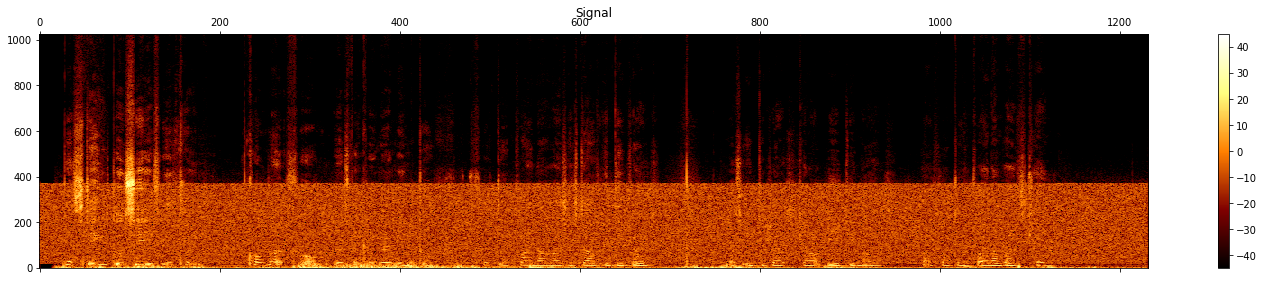

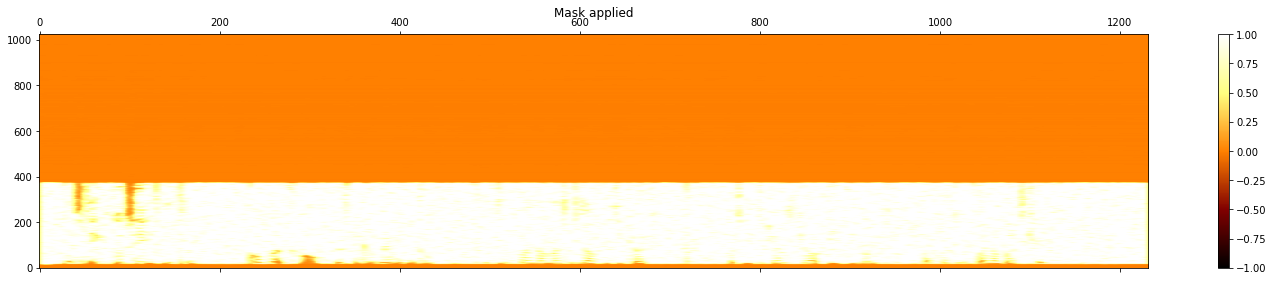

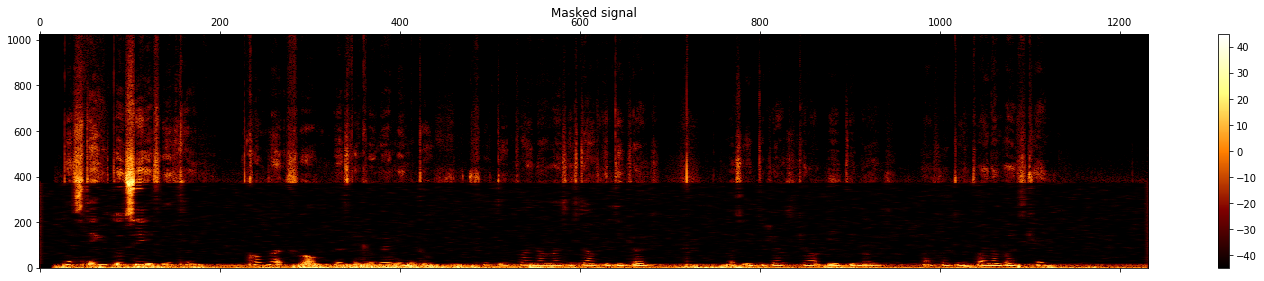

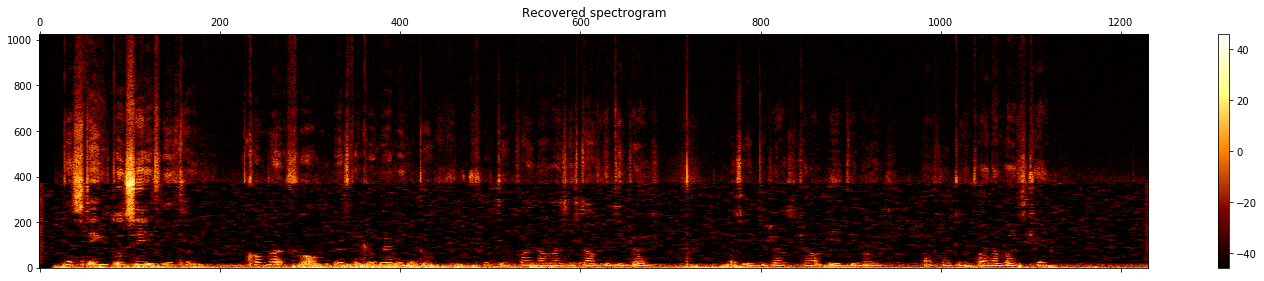

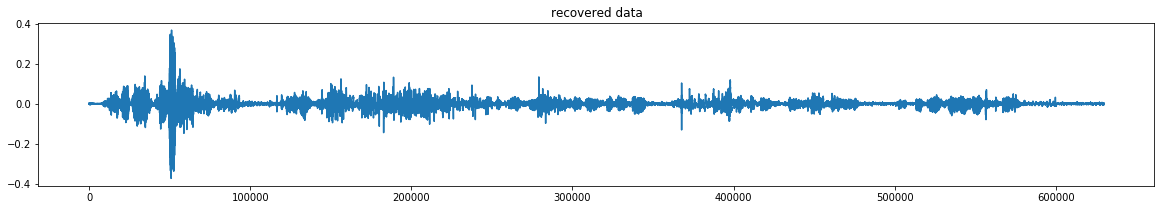

In [8]:
# denoise
noise_reduced = nr.reduce_noise(audio_clip=audio_clip_band_limited, noise_clip=noise_clip, verbose=True)

fig, ax = plt.subplots(figsize=(20,3))
plt.title("recovered data")
ax.plot(noise_reduced)
IPython.display.Audio(data=noise_reduced, rate=rate)

In [9]:
# currentDir = os.getcwd()
# wavDir = os.path.join(currentDir, "mywav.wav")

# if '.wav' in wavDir:
#     # load data
#     rate, data = wavfile.read("mywav.wav")
#     print(data.shape)
#     # select section of data that is noise
#     noisy_part = data[10000:15000]
#     # perform noise reduction
#     reduced_noise = nr.reduce_noise(audio_clip=data, noise_clip=noisy_part, verbose=True)

In [19]:
def _stft(y, n_fft, hop_length, win_length):
    return librosa.stft(y=y, n_fft=n_fft, hop_length=hop_length, win_length=win_length)

def _amp_to_db(x):
    return librosa.core.amplitude_to_db(x, ref=1.0, amin=1e-20, top_db=80.0)

In [54]:
#from PIL import Image
def plot_spectrogram(signal, title, cmap):
    fig, ax = plt.subplots(figsize=(20, 4))
    cax = ax.matshow(
        signal,
        origin="lower",
        aspect="auto",
        #cmap=plt.cm.seismic,
        #cmap="gray",
        cmap=cmap,
        vmin=-1 * np.max(np.abs(signal)),
        vmax=np.max(np.abs(signal)),
    )
    #img = Image.fromarray(signal)
    fig.colorbar(cax)
    ax.set_title(title)
    plt.tight_layout()
    #plt.imshow(img, cmap='gray')
    plt.show()

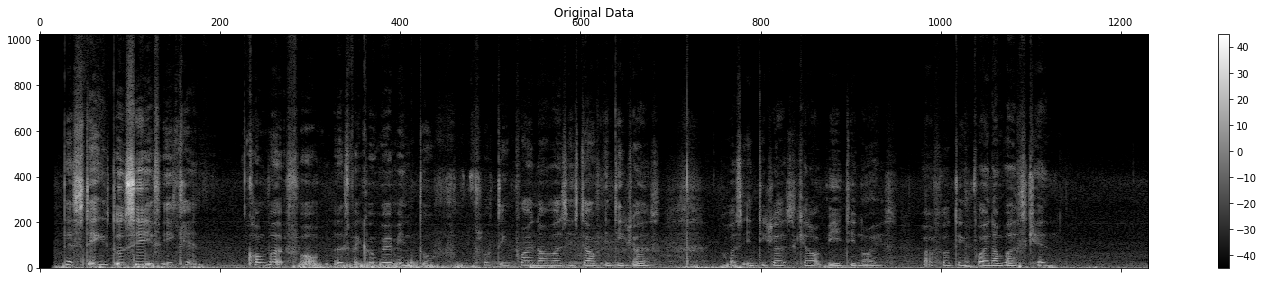

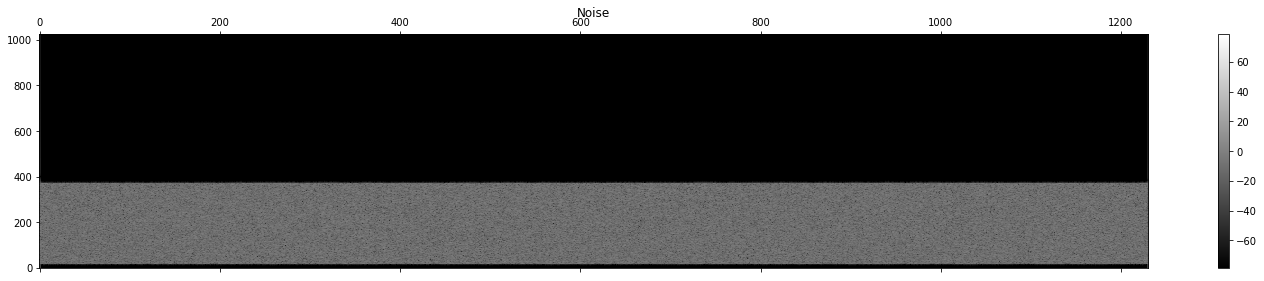

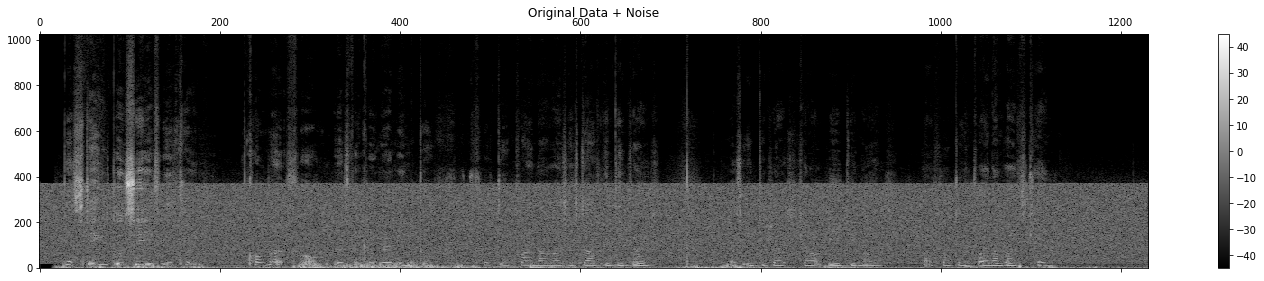

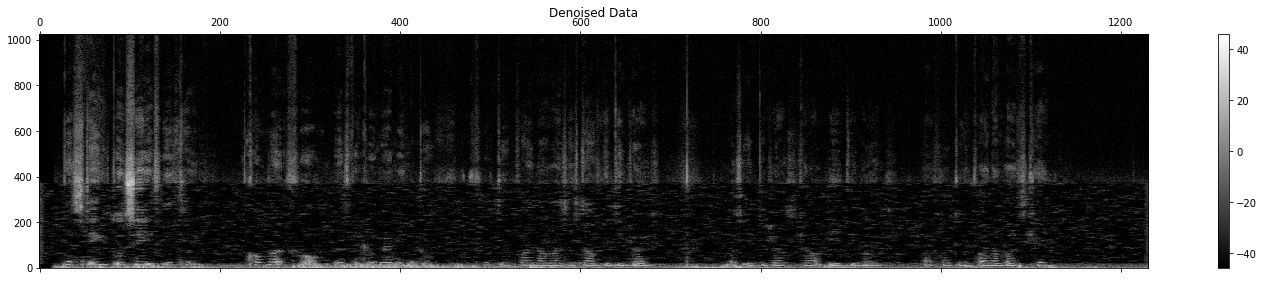

In [62]:
# STFT
data_stft = _stft(data, 2048, 512, 2048)
data_stft_db = _amp_to_db(np.abs(data_stft))  # convert to dB

noise_stft = _stft(noise, 2048, 512, 2048)
noise_stft_db = _amp_to_db(np.abs(noise_stft))  # convert to dB

audio_clip_band_limited_stft = _stft(audio_clip_band_limited, 2048, 512, 2048)
audio_clip_band_limited_stft_db = _amp_to_db(np.abs(audio_clip_band_limited_stft))  # convert to 

noise_reduced_stft = _stft(noise_reduced, 2048, 512, 2048)
noise_reduced_stft_db = _amp_to_db(np.abs(noise_reduced_stft))  # convert to dB

cmap = "gray"

plot_spectrogram(data_stft_db, "Original Data", cmap)
plot_spectrogram(noise_stft_db, "Noise", cmap)
plot_spectrogram(audio_clip_band_limited_stft_db, "Original Data + Noise", cmap)
plot_spectrogram(noise_reduced_stft_db, "Denoised Data", cmap)